## Import Libraries

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor
from sklearn.feature_selection import VarianceThreshold

In [16]:
X = pd.read_csv('data/fingerprints.csv', index_col = 0)
df = pd.read_csv('data/p2x4_final.csv')
df_Y = df['pIC50']
Y = df_Y

In [17]:
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
Name,,,,,,,,,,,,,,,,,,,,,
CHEMBL216504,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
CHEMBL69234,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
CHEMBL413145,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
CHEMBL494161,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
CHEMBL526307,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58578840,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
68020375,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
117752163,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [18]:
Y

0     4.00
1     4.56
2     6.00
3     5.00
4     5.00
      ... 
550   4.52
551   4.52
552   4.52
553   4.52
554   4.52
Name: pIC50, Length: 555, dtype: float64

In [19]:
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [20]:
X.shape

(555, 155)

In [21]:
clf = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

In [22]:
import random

random_states = random.sample(range(1, 101), 10)

In [23]:
random_states

[44, 48, 83, 96, 5, 38, 67, 29, 53, 46]

In [24]:
#random_states = [0, 42, 70, 84, 93, 108, 123]  # list of random states to use

In [25]:
combined_data = pd.DataFrame()  # initialize an empty DataFrame to store results

In [26]:
for state in random_states:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=state)
    models_train, predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
    models_test, predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

    predictions_train['Type'] = 'Train'
    predictions_test['Type'] = 'Test'

    single_state_data = pd.concat([predictions_train, predictions_test])
    single_state_data['Random State'] = state  # add column indicating the random state used

    combined_data = pd.concat([combined_data, single_state_data])

sorted_combined_data = combined_data.sort_values(by=["Random State", "Type", "R-Squared"], ascending=[True, True, False])

100%|██████████| 42/42 [00:11<00:00,  3.65it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:13<00:00,  3.17it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:14<00:00,  2.81it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:28<00:00,  1.45it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:39<00:00,  1.05it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:45<00:00,  1.07s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:49<00:00,  1.19s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:20<00:00,  2.06it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:05<00:00,  7.47it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:05<00:00,  8.36it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:05<00:00,  8.10it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:05<00:00,  8.10it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:05<00:00,  7.28it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:06<00:00,  6.96it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:05<00:00,  8.30it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:04<00:00,  8.58it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:05<00:00,  7.35it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:05<00:00,  7.48it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:05<00:00,  7.87it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:05<00:00,  7.64it/s]


In [27]:
sorted_combined_data

,Adjusted R-Squared,R-Squared,RMSE,Time Taken,Type,Random State
Model,,,,,,
BaggingRegressor,1.61,0.75,0.53,0.06,Test,5
RandomForestRegressor,1.61,0.75,0.54,0.34,Test,5
HistGradientBoostingRegressor,1.63,0.74,0.54,0.17,Test,5
MLPRegressor,1.63,0.74,0.55,0.28,Test,5
XGBRegressor,1.64,0.74,0.55,0.09,Test,5
...,...,...,...,...,...,...
DummyRegressor,-0.54,0.00,1.16,0.03,Train,96
QuantileRegressor,-0.57,-0.02,1.17,4.03,Train,96
KernelRidge,-35.81,-22.93,5.65,0.06,Train,96


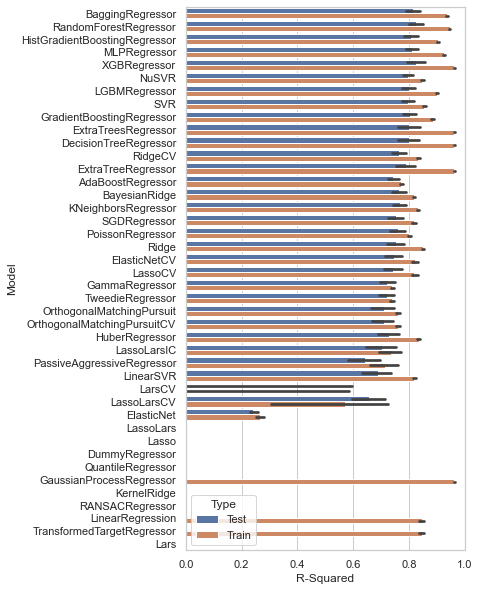

In [28]:

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")

ax = sns.barplot(y=sorted_combined_data.index, x="R-Squared", hue='Type', data=sorted_combined_data)

ax.set(xlim=(0, 1))

plt.show()

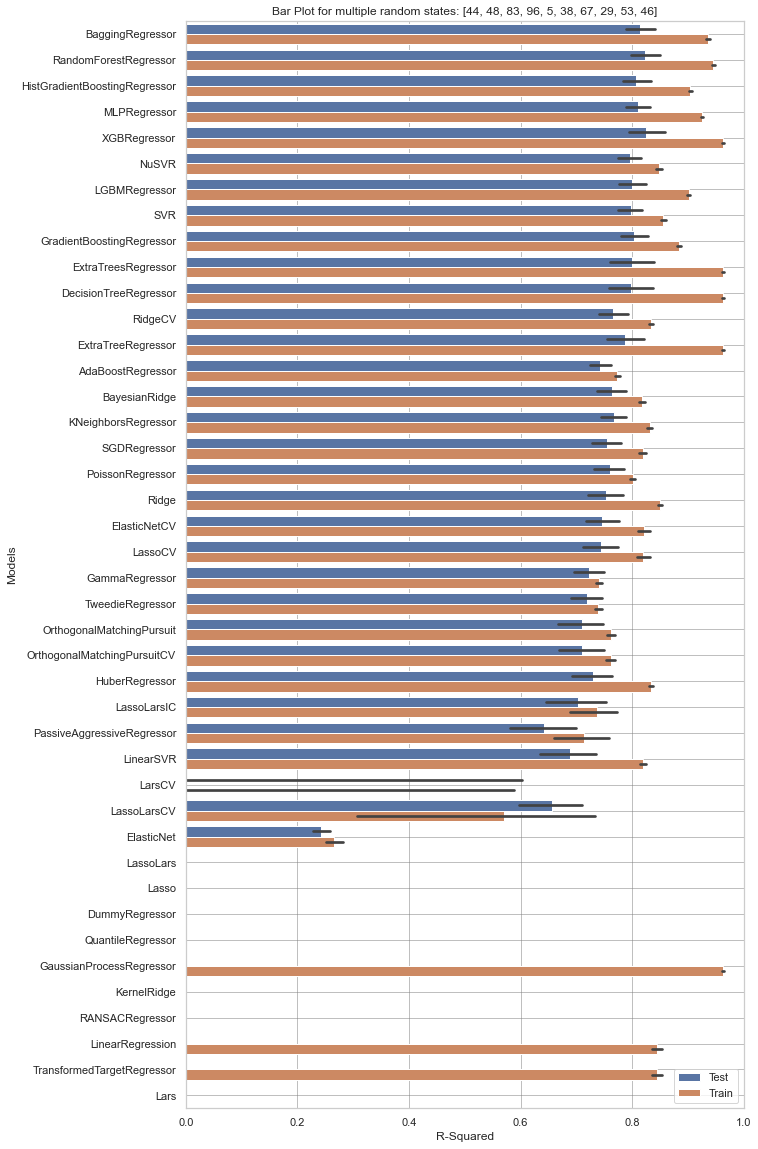

In [29]:
# Set the size of the figure and the theme
plt.figure(figsize=(10, 20))
sns.set_theme(style="whitegrid")

# Create a bar plot
ax = sns.barplot(y=sorted_combined_data.index, x="R-Squared", hue='Type', data=sorted_combined_data)

# Add a legend and informative axis label
ax.legend(loc="lower right", frameon=True)
ax.set(xlim=(0, 1), xlabel="R-Squared", ylabel="Models")
plt.title(f"Bar Plot for multiple random states: {random_states}" )

# Adding gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.5)

plt.savefig('figures/multiple_random_state.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

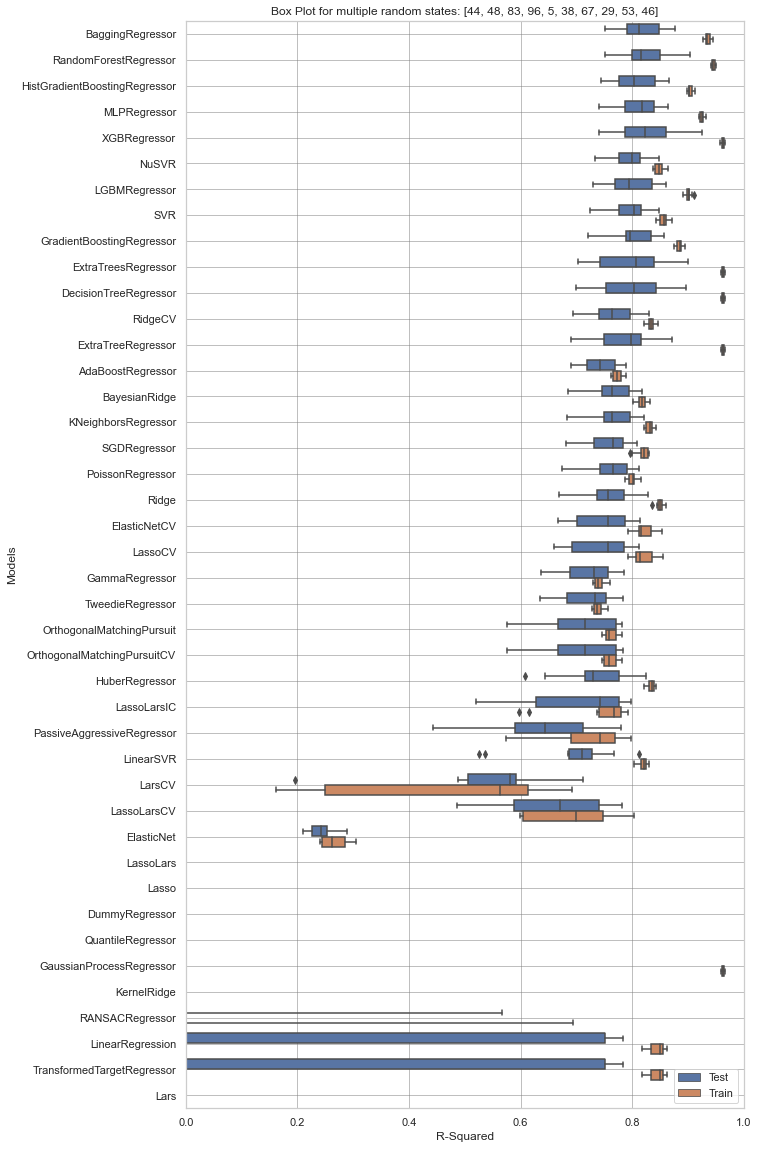

In [30]:
import numpy as np

plt.figure(figsize=(10, 20))
sns.set_theme(style="whitegrid")

# Create a boxplot
ax = sns.boxplot(y=sorted_combined_data.index, x="R-Squared", hue='Type', data=sorted_combined_data)

# Add a legend and informative axis label
ax.legend(loc="lower right", frameon=True)
ax.set(xlim=(0, 1), xlabel="R-Squared", ylabel="Models")

plt.title(f"Box Plot for multiple random states: {random_states}" )

# Adding gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.5)

#plt.savefig('figures/multiple_random_state_box.png', dpi=300, bbox_inches='tight')
plt.show()
